<a href="https://colab.research.google.com/github/rinaldy143/machine-learning/blob/master/Salinan_dari_Copy_of_bekerja_dengan_def_dan_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contoh case 1
Coba membuat oop untuk membantu penyelesaian sistem persamaan linear dengan regresi metode least square method.

Rumus-rumus yang penting:

$a=\frac{n\sum{xy}-\sum{x}\sum{y}}{n\sum{x^2}-(\sum{x})^2}$

$b=\frac{\sum{y}-a\sum{x}}{n}$


In [ ]:
class regresi:
  #membuat oop regresi linear sederhana (least square method)

  #init method dikenal sebagai constructor dalam bahasa c++ dan java
  def __init__(self,x,y):
    self.x  = x
    self.y  = y

  #Sample method
  def ls(self):
    xy = self.x * self.y
    x2 = self.x**2
    sumx = sum(self.x)
    sumy = sum(self.y)
    sumxy = sum(self.x*self.y)
    sumx2 = sum(self.x**2)
    n = len(self.x)
    m = (n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
    c = (sumy-m*sumx)/n
    print('nilai gradien & interceptnya: ',m,c)
    return [m,c]

In [ ]:
a = (1,2,3)
b = list(a)
type(b)

list

nilai gradien & interceptnya:  0.8 2.0
hasil regresi linear dengan least square [0.8, 2.0]


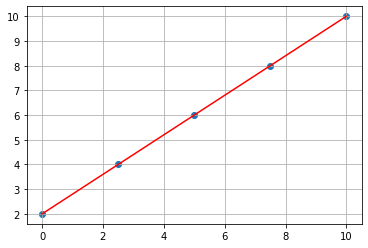

In [ ]:
import numpy as np #numpy kita gunakan untuk mengatasi masalah operasi pada list
z=np.linspace(0,10,5) #inisiasi x
z0=np.array([2.0,4.0,6.0,8.0,10.0]) #inisiasi y
coba = regresi(z,z0) #manggil class regresi
abs=coba.ls() #simpan hasil least square dalam variabel yang namanya abs
print('hasil regresi linear dengan least square',abs)

#contoh singkat plot hasil regresi linear
import matplotlib.pyplot as plt
z_reg = z*abs[0] + abs[1] #buat prediksi dengan model yang disimpan di abs ke dalam var baru bernama z_reg
plt.scatter(z,z0)
plt.plot(z,z_reg,'r')
plt.grid()
plt.show()

In [ ]:
#Kasus baru yaa.. ada data dari perusahaan mengenai lama hari operasi
#dan jumlah zat B yang terkandung di dalamnya

with open('/content/drive/MyDrive/Seri berkenalan dengan Python/Seri 2/data_proyek_1.txt') as f:
    r=f.readlines()
    f.close()
len(r)

401

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#tambah ilmu sedikit yaa..
#looping

data_x = [] #list kosong
data_y = [] #list kosong
for i in range(len(r)-1):
  a=r[i+1].split() #fungsi split untuk memisahkan nilai dalam list
  data_x.append(float(a[0])) #fungsi append untuk menambahkan elemen dalam list
  data_y.append(float(a[1])) #fungsi append untuk menambahkan elemen dalam list
print('data x ke-1 sampai ke-5',data_x[0:5])
print('data y ke-1 sampai ke-5',data_y[0:5])
print(len(data_x))

data x ke-1 sampai ke-5 [0.0, 1.0, 2.0, 3.0, 4.0]
data y ke-1 sampai ke-5 [20.0, 20.5, 21.0, 21.5, 22.0]
400


In [ ]:
model=regresi(np.array(data_x),np.array(data_y))
par=model.ls()

nilai gradien & interceptnya:  0.19422268445427718 19.947699451371708


**Ketemu nih...**

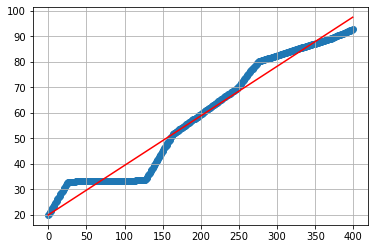

In [ ]:
#ploting
y_model=par[0]*np.array(data_x)+par[1]
plt.scatter(data_x,data_y)
plt.plot(data_x,y_model,'-r')
plt.grid()
plt.show()

In [ ]:
test=np.array([20,40,180.5,365])
test_pred=par[0]*test + par[1]
print(test_pred)

[23.83215314 27.71660683 55.004894   90.83897928]


In [ ]:
#cari t dari nilai y dan parameter yang sudah didapat pada y = mx + c
x=(100-par[1])/par[0]
x

412.1676145788921

# Contoh Case 2

Membuat wordcloud sebagai visualisasi awal teks yang sering dipakai dalam cabang ilmu NLP

In [ ]:
import pandas as pd

In [ ]:
feedback = pd.read_csv('/content/drive/MyDrive/coba_simple_world_cloud - Sheet1.csv')
feedback.head()

,peserta,survey1,survey2,survey3
0,1,-,-,-
1,2,Cukup jelas,Sangat jelas,Semoga kedepannya ada grup sharing pengalaman
2,3,"Menarik, menmbah pengetahuan",Ya,Ya
3,4,sangat bermanfaat sekali dan sangat informatif...,ya dengan jelas sekali namun sangat cepat,banyak hal baru yang dipelajari
4,5,Sangat senang bisa belajar phyton dari dasar.,iya,next time semoga ada materi lebih menarik lagi


In [ ]:
import re

wc_1=[]
for i in feedback.survey1:
  z=re.sub(r"[^a-zA-Z0-9]"," ",i.lower()).split() #hapus karakter spesial + dikecilin + pisah/tokenizing
  wc_1 += z
print(wc_1[:5])
print(len(wc_1))

NameError: ignored

In [ ]:
#siapin stopwords
with open('/content/drive/MyDrive/Seri berkenalan dengan Python/Seri 2/stopword_indonesia.txt') as sw:
  stopwords = sw.readlines()
  sw.close()
print(len(stopwords))
#print(stopwords[:10])
#print(stopwords[1] == 'adalah')

stop=[]
for i in stopwords:
   z=re.sub(r"[^a-zA-Z0-9]","",i)
   stop.append(z)

print(stop[:5])

771
['ada', 'adalah', 'adalh', 'adlah', 'adanya']


In [ ]:
#buang stopwords dari token
dt_teks = []
for i in wc_1:
  if i not in stop:
    dt_teks.append(i)

teks = ' '.join(i for i in dt_teks)

print('stopwords yang terbuang sebanyak :', len(wc_1)-len(dt_teks))
print('setelah di join after cleaning menjadi teks -->',teks[:50])

stopwords yang terbuang sebanyak : 246
setelah di join after cleaning menjadi teks --> menarik menmbah pengetahuan bermanfaat informatif 


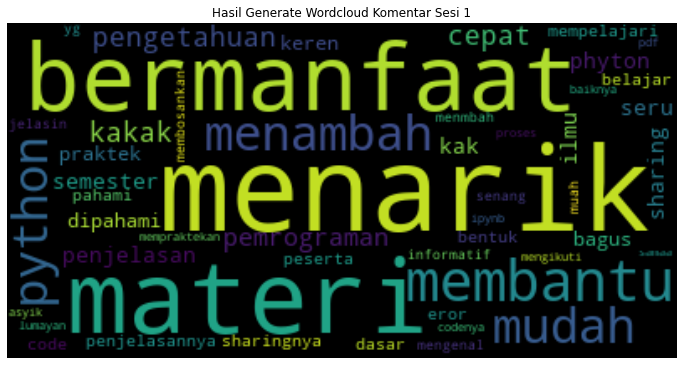

In [ ]:
#sekarang buat wordcloud
import wordcloud #library untuk membuat wordcloud
import matplotlib.pyplot as plt

wc=wordcloud.WordCloud(max_words=50,max_font_size=70).generate(teks) #wordcloudnya udah jadi tinggal ditampilin
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Hasil Generate Wordcloud Komentar Sesi 1')
plt.show()